# Lecture 11.2: Statistical Modeling II
<div style="border: 1px double black; padding: 10px; margin: 10px">
    
We will learn more about linear regression
</div>


In [2]:
library(tidyverse)
library(modelr)
library(lubridate)

### Review
Use the linear model to determine:
1. Expected price of a one-carat diamond with a good cut.
2. If the average city gas mileage for Audis is statistically different from the average city gas mileage for Volkswagens.

In [3]:
good <- filter(diamonds, cut == "Good") 
print(good)
diamondlm <- lm(price~carat,good)
tibble(carat=c(1),cut="Good")%>%add_predictions(diamondlm)

# A tibble: 4,906 × 10
   carat cut   color clarity depth table price     x     y     z
   <dbl> <ord> <ord> <ord>   <dbl> <dbl> <int> <dbl> <dbl> <dbl>
 1  0.23 Good  E     VS1      56.9    65   327  4.05  4.07  2.31
 2  0.31 Good  J     SI2      63.3    58   335  4.34  4.35  2.75
 3  0.3  Good  J     SI1      64      55   339  4.25  4.28  2.73
 4  0.3  Good  J     SI1      63.4    54   351  4.23  4.29  2.7 
 5  0.3  Good  J     SI1      63.8    56   351  4.23  4.26  2.71
 6  0.3  Good  I     SI2      63.3    56   351  4.26  4.3   2.71
 7  0.23 Good  F     VS1      58.2    59   402  4.06  4.08  2.37
 8  0.23 Good  E     VS1      64.1    59   402  3.83  3.85  2.46
 9  0.31 Good  H     SI1      64      54   402  4.29  4.31  2.75
10  0.26 Good  D     VS2      65.2    56   403  3.99  4.02  2.61
# … with 4,896 more rows


carat,cut,pred
<dbl>,<chr>,<dbl>
1,Good,5056.908


### Formulas with factors
The situation becomes more interesting when we consider models that contain factors:

#### For instance, let say our outcome variable $Y$ is height and our explanatory variable $X$ is sex (Male or Female).  Then, sex is a categorical variable with two categories.  The lm function will do something special to the variable sex by creating an indicator variable that takes value one if sex is male, and value 0 if sex is female.  

In [4]:
minimpg <- filter(mpg, manufacturer %in% c("audi", "volkswagen"))
mdl <- lm(cty ~ manufacturer, minimpg)
summary(mdl)
model_matrix(minimpg, cty ~ manufacturer) %>% print



Call:
lm(formula = cty ~ manufacturer, data = minimpg)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9259 -1.9259  0.0741  0.3889 14.0741 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             17.6111     0.8849  19.901  < 2e-16 ***
manufacturervolkswagen   3.3148     1.1424   2.902  0.00583 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.754 on 43 degrees of freedom
Multiple R-squared:  0.1637,	Adjusted R-squared:  0.1443 
F-statistic: 8.419 on 1 and 43 DF,  p-value: 0.005834


# A tibble: 45 × 2
   `(Intercept)` manufacturervolkswagen
           <dbl>                  <dbl>
 1             1                      0
 2             1                      0
 3             1                      0
 4             1                      0
 5             1                      0
 6             1                      0
 7             1                      0
 8             1                      0
 9             1                      0
10             1                      0
# … with 35 more rows


### Interpreting the output of `summary(lm(...))`

In [5]:
mdl <- lm(cty ~ class, data = mpg) 
summary(mdl)
model_matrix(mpg,cty~class) %>% print
unique(mpg$class) %>% print


Call:
lm(formula = cty ~ class, data = mpg)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3714 -1.7561 -0.1277  1.0000 14.6286 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      15.4000     1.3024  11.824  < 2e-16 ***
classcompact      4.7277     1.3699   3.451 0.000666 ***
classmidsize      3.3561     1.3796   2.433 0.015759 *  
classminivan      0.4182     1.5708   0.266 0.790307    
classpickup      -2.4000     1.3976  -1.717 0.087304 .  
classsubcompact   4.9714     1.3923   3.571 0.000435 ***
classsuv         -1.9000     1.3539  -1.403 0.161884    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.912 on 227 degrees of freedom
Multiple R-squared:  0.5438,	Adjusted R-squared:  0.5317 
F-statistic:  45.1 on 6 and 227 DF,  p-value: < 2.2e-16


# A tibble: 234 × 7
   `(Intercept)` classcompact classmidsize classminivan classpickup
           <dbl>        <dbl>        <dbl>        <dbl>       <dbl>
 1             1            1            0            0           0
 2             1            1            0            0           0
 3             1            1            0            0           0
 4             1            1            0            0           0
 5             1            1            0            0           0
 6             1            1            0            0           0
 7             1            1            0            0           0
 8             1            1            0            0           0
 9             1            1            0            0           0
10             1            1            0            0           0
# … with 224 more rows, and 2 more variables: classsubcompact <dbl>,
#   classsuv <dbl>
[1] "compact"    "midsize"    "suv"        "2seater"    "minivan"   
[6] "pi

#### Degrees of freedom

In [6]:
nrow(mpg)
coef(mdl) %>% length
df <- 234 - 7

[1] 234

[1] 7

#### Residuals

In [7]:
resids <- add_residuals(mpg, mdl) %>% arrange(desc(resid)) %>% pluck("resid")
head(resids) %>% print

      222       213       223       197       100       162 
14.628571 12.872340  8.628571  7.872340  7.628571  6.500000 


#### Residual standard error
The residual sum of squares is 

$$\text{RSS} = \frac{1}{\text{df}_e}\sum_{i=1}^{n} [y_i - \hat{y}_i(a_1,a_2)]^2$$.

Hence, $\text{RSS}/\rm{df}_e \approx \rm{var}(\epsilon)$.

In [8]:
rss <- sum(resids^2) 
sqrt(rss / df)

[1] 2.912303

#### $p$- and $t$-values

In [9]:
2 * pt(3.372, 228, lower.tail = F)

[1] 0.0008765329

#### Multiple $R^2$

$$R^2 = 1 - \frac{\text{RSS}}{\text{TSS}}$$

"Fraction of variance explained."

In [10]:
tss = var(mpg$cty) * nrow(mpg)  # total sum of squares
R2 <- 1 - rss / tss; print(R2)

[1] 0.5457541


#### $\bar{R}^2$, a.k.a adjusted $R^2$

$$\bar{R}^2 = 1 - \frac{\text{RSS}/\rm{df}_e}{\text{TSS}/\rm{df}_t}$$

In [11]:
adj_R2 <- 1 - (rss / (df - 1)) / (tss / (nrow(mpg) - 1)); print(adj_R2)

[1] 0.5316845


#### $F$-test

In [12]:
aov(cty ~ class, mpg) %>% summary

             Df Sum Sq Mean Sq F value Pr(>F)    
class         6   2295   382.5    45.1 <2e-16 ***
Residuals   227   1925     8.5                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### Gapminder
The `gapminder` package contains data from [Gapminder](https://www.gapminder.org/), which was popularised by Swedish statistician Hans Rosling. If you don't know about this data or this person, pause the lecture and take five minutes and [watch one of his videos](https://www.youtube.com/watch?v=jbkSRLYSojo).

In [13]:
install.packages("gapminder")
library(gapminder)
gapminder %>% print


The downloaded binary packages are in
	/var/folders/ng/qcb7p5f14nl6kwpxnh6rz73h0000gn/T//RtmpTeigQv/downloaded_packages
# A tibble: 1,704 × 6
   country     continent  year lifeExp      pop gdpPercap
   <fct>       <fct>     <int>   <dbl>    <int>     <dbl>
 1 Afghanistan Asia       1952    28.8  8425333      779.
 2 Afghanistan Asia       1957    30.3  9240934      821.
 3 Afghanistan Asia       1962    32.0 10267083      853.
 4 Afghanistan Asia       1967    34.0 11537966      836.
 5 Afghanistan Asia       1972    36.1 13079460      740.
 6 Afghanistan Asia       1977    38.4 14880372      786.
 7 Afghanistan Asia       1982    39.9 12881816      978.
 8 Afghanistan Asia       1987    40.8 13867957      852.
 9 Afghanistan Asia       1992    41.7 16317921      649.
10 Afghanistan Asia       1997    41.8 22227415      635.
# … with 1,694 more rows


To begin with we will focus on how life expectancy varies by year and by country.

`geom_smooth()` using formula 'y ~ x'



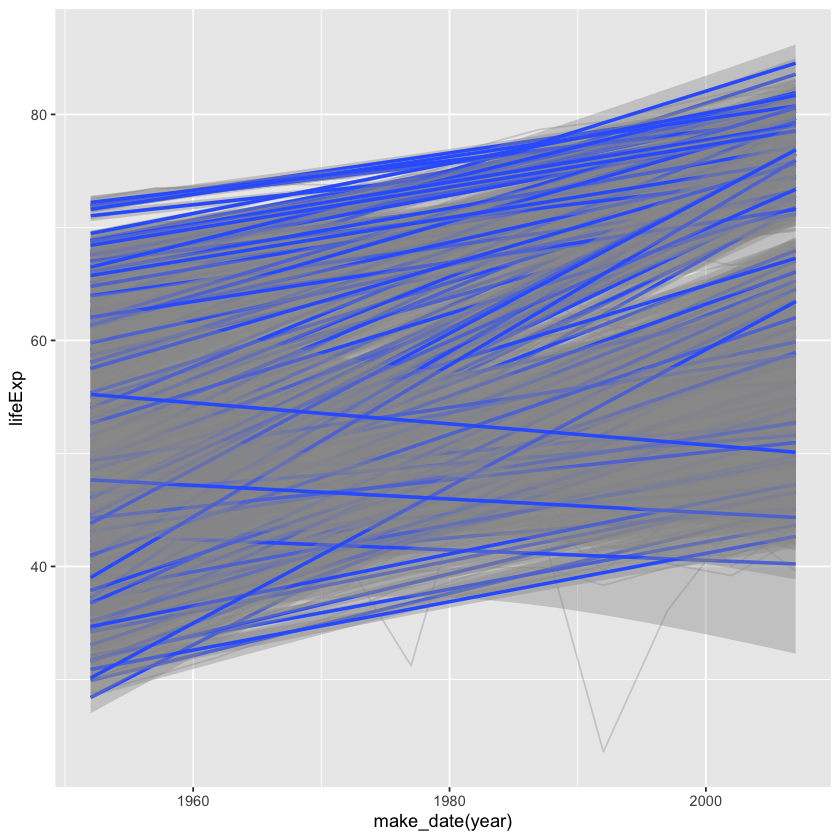

In [15]:
ggplot(gapminder, aes(x = make_date(year), y = lifeExp, group = country))  + 
    geom_line(alpha = 3/20) + geom_smooth(method="lm")

The regression line shows that overall trend in life expectancy has been upwards over the last fifty years. That's good! But there are some obvious exceptions. 

The linear trend is a good fit most of the non-African and non-Asian countries. However, beginning in the 1990s, a number of African countries have lagged far behind the rest of the world in terms of life expectancy. 

## Interaction terms
To dig deeper we will want to fit a separate linear model to each country. We want our model to be:

$$\text{lifeExp}_{c}(\text{year}) = \alpha_c + \beta_c \cdot \text{year}.$$

Here $c$ indexes countries. To do this we will add an interaction term:

In [16]:
mdl <- lm(lifeExp ~ country * year,
          data=filter(gapminder, as.character(country) %in% c("Turkey", "Benin", "Albania")))
summary(mdl)# summary(mdl)


Call:
lm(formula = lifeExp ~ country * year, data = filter(gapminder, 
    as.character(country) %in% c("Turkey", "Benin", "Albania")))

Residuals:
   Min     1Q Median     3Q    Max 
-3.999 -1.080  0.191  1.054  2.244 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -5.941e+02  4.921e+01 -12.072 4.81e-13 ***
countryBenin       -1.876e+01  6.960e+01  -0.270    0.789    
countryTurkey      -3.305e+02  6.960e+01  -4.749 4.73e-05 ***
year                3.347e-01  2.486e-02  13.463 2.99e-14 ***
countryBenin:year  -4.503e-04  3.516e-02  -0.013    0.990    
countryTurkey:year  1.626e-01  3.516e-02   4.624 6.73e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.486 on 30 degrees of freedom
Multiple R-squared:  0.9837,	Adjusted R-squared:  0.981 
F-statistic: 363.1 on 5 and 30 DF,  p-value: < 2.2e-16


To understand what this does, let's turn to the model matrix:

In [17]:
gapminder[1,]
model_matrix(gapminder, lifeExp ~ country * year)[1,]

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453


(Intercept),countryAlbania,countryAlgeria,countryAngola,countryArgentina,countryAustralia,countryAustria,countryBahrain,countryBangladesh,countryBelgium,⋯,countryUganda:year,countryUnited Kingdom:year,countryUnited States:year,countryUruguay:year,countryVenezuela:year,countryVietnam:year,countryWest Bank and Gaza:year,"countryYemen, Rep.:year",countryZambia:year,countryZimbabwe:year
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


The interaction term creates a separate slope *and* intercept term for every country except one.

## Measurements of model quality
So far we have looked at residuals to judge how well the models fit. There are other more general measurements of model quality. To help us look at these we will use the `broom` package for turning models into tidy data:

In [18]:
library(broom)


Attaching package: ‘broom’


The following object is masked from ‘package:modelr’:

    bootstrap




The `broom::glance()` function lets us quickly look at a model and judge how well it fits:

In [19]:
nz = gapminder %>% filter(country == "New Zealand")
nz_mod = lm(lifeExp ~ year, data = nz)
glance(nz_mod)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9535846,0.9489431,0.8043472,205.4459,5.407324e-08,1,-13.32064,32.64128,34.096,6.469743,10,12


`glance` prints out some technical measurements of how well the model fits. The basic one is `r.squared`. In the simple linear model this simply measures the square of the correlation between the predictions $\hat{\mathbf{y}}$ and the observations $\mathbf{y}$:

In [20]:
nz %>% add_predictions(nz_mod) %>% summarize(r2 = cor(lifeExp, pred) ** 2)

r2
<dbl>
0.9535846


To investigate each country individually, we are going to want to fit a linear model separately. For that we'll use a new command called `nest()`. The purpose of `nest()` is to package up our data frame into a bunch of nested data frames:

In [21]:
by_country = gapminder %>% group_by(country, continent) %>% nest
print((by_country))

# A tibble: 142 × 3
# Groups:   country, continent [142]
   country     continent data             
   <fct>       <fct>     <list>           
 1 Afghanistan Asia      <tibble [12 × 4]>
 2 Albania     Europe    <tibble [12 × 4]>
 3 Algeria     Africa    <tibble [12 × 4]>
 4 Angola      Africa    <tibble [12 × 4]>
 5 Argentina   Americas  <tibble [12 × 4]>
 6 Australia   Oceania   <tibble [12 × 4]>
 7 Austria     Europe    <tibble [12 × 4]>
 8 Bahrain     Asia      <tibble [12 × 4]>
 9 Bangladesh  Asia      <tibble [12 × 4]>
10 Belgium     Europe    <tibble [12 × 4]>
# … with 132 more rows


### Exercise
Use `map()` to run a regression of life expectancy over time for *each* of the 142 countries in this data set. Store the results in a column called `model`.

In [22]:
f <- function(df) lm(lifeExp ~ year, data = df)
gl <- mutate(by_country, model = map(.x = data, .f = f),
             glance = map(model, broom::glance)) %>% 
             unnest(glance) %>% arrange(desc(r.squared)) %>% print

# A tibble: 142 × 16
# Groups:   country, continent [142]
   country           continent data  model r.squared adj.r.squared sigma statistic
   <fct>             <fct>     <lis> <lis>     <dbl>         <dbl> <dbl>     <dbl>
 1 Brazil            Americas  <tib… <lm>      0.998         0.998 0.326     5111.
 2 Mauritania        Africa    <tib… <lm>      0.998         0.997 0.408     4290.
 3 France            Europe    <tib… <lm>      0.998         0.997 0.220     4200.
 4 Switzerland       Europe    <tib… <lm>      0.997         0.997 0.215     3823.
 5 Pakistan          Asia      <tib… <lm>      0.997         0.997 0.403     3626.
 6 Indonesia         Asia      <tib… <lm>      0.997         0.997 0.646     3455.
 7 Equatorial Guinea Africa    <tib… <lm>      0.997         0.997 0.329     3184.
 8 Comoros           Africa    <tib… <lm>      0.997         0.997 0.479     3165.
 9 Nicaragua         Americas  <tib… <lm>      0.997         0.996 0.598     3092.
10 Guatemala         Americas

Plotting the resulting data, we see that most countries are fit pretty well by the linear model. But some countries, especially those in Africa, have a very bad fit:

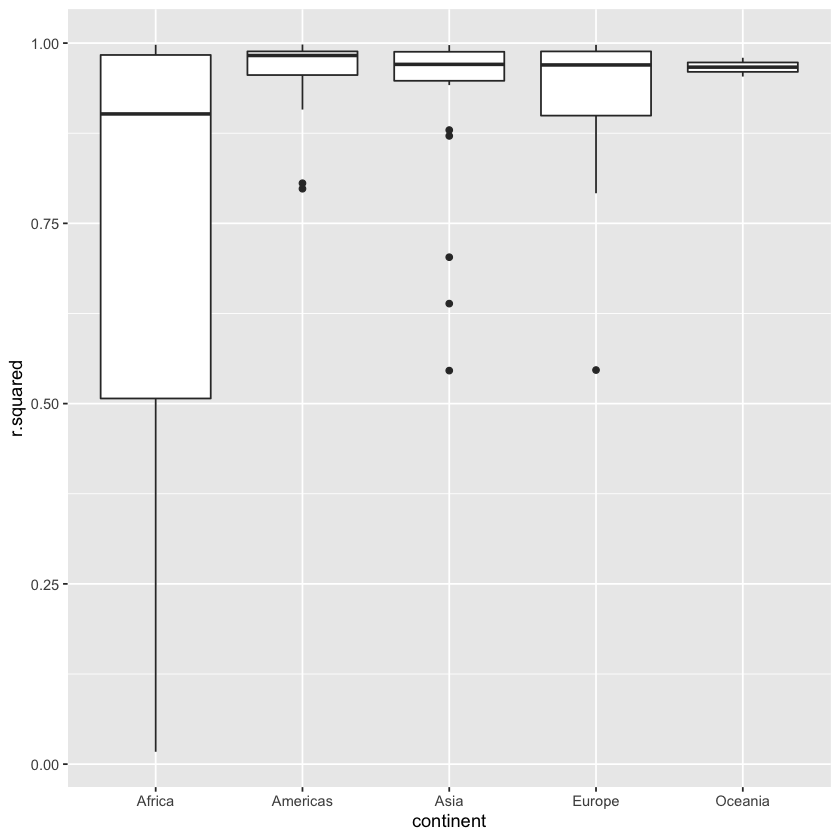

In [23]:
 ggplot(gl, aes(x = continent, y = r.squared)) + geom_boxplot()

Let's extract those for further analysis:

# A tibble: 6 × 16
# Groups:   country, continent [6]
  country  continent data  model r.squared adj.r.squared sigma statistic p.value
  <fct>    <fct>     <lis> <lis>     <dbl>         <dbl> <dbl>     <dbl>   <dbl>
1 Lesotho  Africa    <tib… <lm>     0.0849      -0.00666  5.93     0.927   0.358
2 Swazila… Africa    <tib… <lm>     0.0682      -0.0250   6.64     0.732   0.412
3 Zambia   Africa    <tib… <lm>     0.0598      -0.0342   4.53     0.636   0.444
4 Zimbabwe Africa    <tib… <lm>     0.0562      -0.0381   7.21     0.596   0.458
5 Botswana Africa    <tib… <lm>     0.0340      -0.0626   6.11     0.352   0.566
6 Rwanda   Africa    <tib… <lm>     0.0172      -0.0811   6.56     0.175   0.685
# … with 7 more variables: df <dbl>, logLik <dbl>, AIC <dbl>, BIC <dbl>,
#   deviance <dbl>, df.residual <int>, nobs <int>


Joining, by = c("country", "continent")



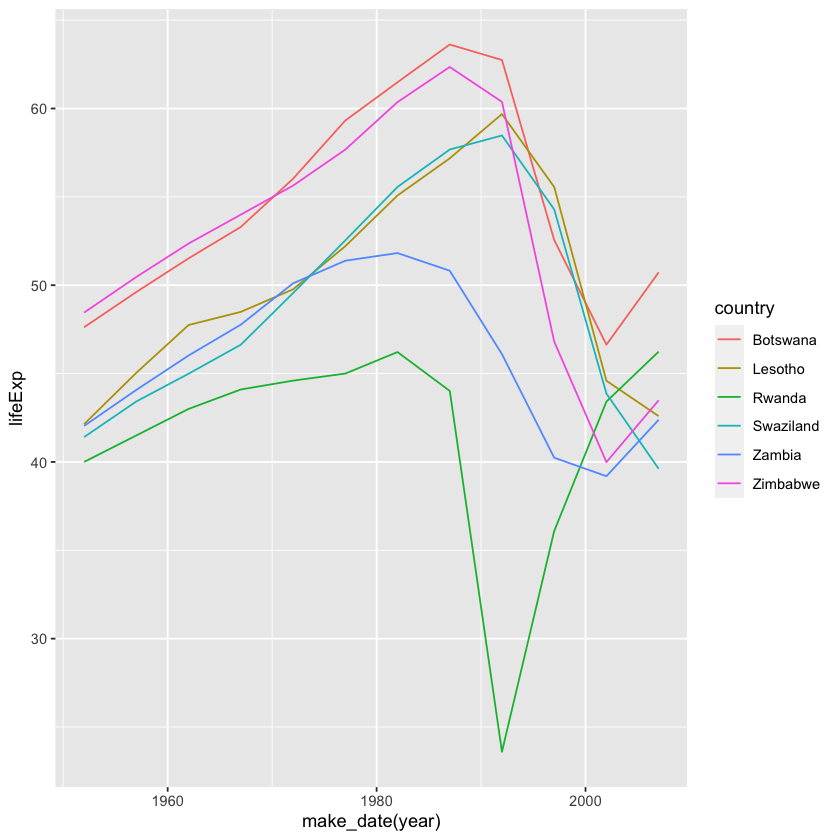

In [24]:
bad_fit = filter(gl, r.squared < 0.25) %>% print
p <- gapminder %>% semi_join(bad_fit) %>% 
    ggplot(aes(make_date(year), lifeExp, color = country)) +
    geom_line()
p